In [1]:
from nilearn.image import mean_img

In [2]:
pwd

'/'

In [33]:
fmri_img = '/sub-NDARINVHPYB4URK/ses-baselineYear1Arm1/func/sub-NDARINVHPYB4URK_ses-baselineYear1Arm1_task-MID_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc-preproc_bold.nii.gz'
#fmri_img = '/ABCD_preproc01/mcflirt/sub-NDARINVHPYB4URK_ses-baselineYear1Arm1_task-SST_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc-preproc_bold_st_mcf.nii.gz'
anat_img = '/sub-NDARINVHPYB4URK/ses-baselineYear1Arm1/anat/sub-NDARINVHPYB4URK_ses-baselineYear1Arm1_rec-normalized_desc-preproc_T1w.nii.gz'

In [34]:
from nilearn.image import mean_img
mean_img = mean_img(fmri_img)

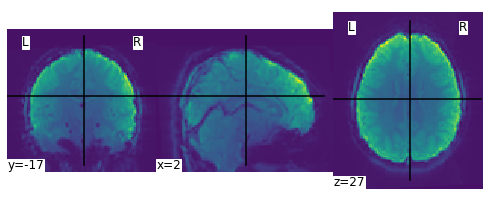

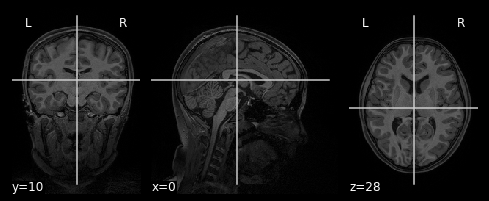

In [35]:
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show, plot_glass_brain
plot_img(mean_img)
plot_anat(anat_img)

In [36]:
from nilearn import image
img = image.load_img(fmri_img)

In [37]:
print(img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (99, 117, 95, 411)
affine: 
[[   2.     0.    -0.   -98.5]
 [   0.     2.    -0.  -134.5]
 [   0.     0.     2.   -72.5]
 [   0.     0.     0.     1. ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  99 117  95 411   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  2.  2.  2.  0.8 1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1394.8054
cal_min         : -107.50513
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixH

In [38]:
img_2 = image.get_data(fmri_img)
img_2

array([[[[0.00744776, 0.00744776, 0.00744776, ..., 0.00744776,
          0.00744776, 0.00744776],
         [0.00744776, 0.00744776, 0.00744776, ..., 0.00744776,
          0.00744776, 0.00744776],
         [0.00744776, 0.00744776, 0.00744776, ..., 0.00744776,
          0.00744776, 0.00744776],
         ...,
         [0.00744776, 0.00744776, 0.00744776, ..., 0.00744776,
          0.00744776, 0.00744776],
         [0.00744776, 0.00744776, 0.00744776, ..., 0.00744776,
          0.00744776, 0.00744776],
         [0.00744776, 0.00744776, 0.00744776, ..., 0.00744776,
          0.00744776, 0.00744776]],

        [[3.05631182, 3.3313973 , 0.00744776, ..., 0.00744776,
          0.00744776, 0.00744776],
         [2.75830255, 3.7898731 , 0.00744776, ..., 0.00744776,
          0.00744776, 0.00744776],
         [2.57491224, 3.76694931, 2.8729215 , ..., 0.00744776,
          0.00744776, 0.00744776],
         ...,
         [0.00744776, 0.00744776, 0.00744776, ..., 0.00744776,
          0.00744776, 0.0

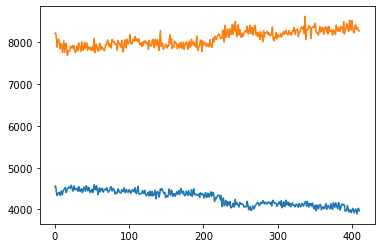

In [39]:
import matplotlib.pyplot as plt
import numpy as np

img_2_time_series = np.zeros((2, 411))
for i in range(411):
    img_2_time_series[0, i] = img_2[:10, :10, :10, i].sum()
    img_2_time_series[1, i] = img_2[10:20, 10:20, 10:20, i].sum()
plt.plot(img_2_time_series[0])
plt.plot(img_2_time_series[1])

# First GLM

첫번째 한번 보고 상윤쌤, 동엽쌤 버전처럼 plotting 한번 해보기 

In [40]:
import pandas as pd

In [41]:
events = pd.read_table('sub-NDARINVHPYB4URK_MID_task_run1_info_getready_rttime.tsv', sep='\t')
events = events.drop(['SubTrial'], axis=1)
events['Onset'] = events['Onset'] / 1000
events['Duration'] = events['Duration'] / 1000

In [42]:
events[:199]

,Onset,Duration,condition
0,8.435,2.000,N_Cue
1,10.401,2.000,N_Ant
2,12.401,0.327,N_Prob
3,12.801,1.623,N_FB_F
4,14.434,2.000,WS_Cue
...,...,...,...
194,315.381,0.387,WB_Prob
195,315.831,1.563,WB_FB_F
196,317.414,2.000,WS_Cue
197,319.381,2.000,WS_Ant


In [43]:
import pandas as pd
events = pd.read_table('sub-NDARINVHPYB4URK_MID_task_run1_info_getready_rttime.tsv', sep='\t')
events = events.drop(['SubTrial'], axis=1)
events['Onset'] = events['Onset'] / 1000
events['Duration'] = events['Duration'] / 1000
events = events.loc[:199]
events = events.rename(columns = {'Onset':'onset', 'Duration':'duration', 'condition':'trial_type'})

In [44]:
import pandas as pd
events = pd.read_table('sub-NDARINVHPYB4URK_MID_task_run1_info_getready_rttime.tsv', sep='\t')
events = events.drop(['SubTrial'], axis=1)
events['Onset'] = events['Onset'] / 1000
events['Duration'] = events['Duration'] / 1000
events = events.loc[:199]
events = events.rename(columns = {'Onset':'onset', 'Duration':'duration', 'condition':'trial_type'})

In [45]:
from nilearn.glm.first_level import FirstLevelModel

In [69]:
fmri_glm = FirstLevelModel(t_r=0.8,
                           noise_model='ar1',
                           hrf_model='spm',
                           drift_model='cosine',
                           high_pass=1./160,
                           smoothing_fwhm=5,
                           signal_scaling=False,
                           minimize_memory=False)

In [70]:
import pandas as pd
confounds = pd.read_csv('sub-NDARINVHPYB4URK/ses-baselineYear1Arm1/func/sub-NDARINVHPYB4URK_ses-baselineYear1Arm1_task-MID_run-1_desc-confounds_timeseries.tsv', delimiter='\t')
confounds

,global_signal,global_signal_derivative1,global_signal_derivative1_power2,global_signal_power2,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter,white_matter_derivative1,...,motion_outlier61,motion_outlier62,motion_outlier63,motion_outlier64,motion_outlier65,motion_outlier66,motion_outlier67,motion_outlier68,motion_outlier69,motion_outlier70
0,367.187470,NaN,NaN,134826.638356,513.344469,NaN,263522.543406,NaN,255.139010,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,325.301140,-41.886331,1754.464694,105820.831479,396.557923,-116.786546,157258.186049,13639.097297,230.847025,-24.291985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,308.341606,-16.959534,287.625787,95074.545907,334.358553,-62.199370,111795.641673,3868.761644,225.406709,-5.440316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,300.831505,-7.510101,56.401619,90499.594246,300.380251,-33.978301,90228.295283,1154.524967,223.266039,-2.140671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,297.576835,-3.254670,10.592876,88551.972632,280.473144,-19.907107,78665.184685,396.292903,223.032905,-0.233133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,295.974925,0.275044,0.075649,87601.156251,261.889573,0.724951,68586.148593,0.525553,222.624437,0.445228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407,296.371471,0.396546,0.157249,87836.049110,261.727043,-0.162531,68501.044806,0.026416,222.743935,0.119498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,296.374150,0.002678,0.000007,87837.636575,261.809966,0.082924,68544.458504,0.006876,222.531199,-0.212736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409,295.706305,-0.667845,0.446017,87442.218651,262.514587,0.704621,68913.908489,0.496490,222.959122,0.427923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
confounds = confounds.replace(np.nan, confounds.median())

In [72]:

ev = events.loc[[4*i for i in range(50)]]
conf = confounds.iloc[:, :9]
conf

,global_signal,global_signal_derivative1,global_signal_derivative1_power2,global_signal_power2,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter
0,367.187470,-0.007569,0.067800,134826.638356,513.344469,0.019920,263522.543406,0.657511,255.139010
1,325.301140,-41.886331,1754.464694,105820.831479,396.557923,-116.786546,157258.186049,13639.097297,230.847025
2,308.341606,-16.959534,287.625787,95074.545907,334.358553,-62.199370,111795.641673,3868.761644,225.406709
3,300.831505,-7.510101,56.401619,90499.594246,300.380251,-33.978301,90228.295283,1154.524967,223.266039
4,297.576835,-3.254670,10.592876,88551.972632,280.473144,-19.907107,78665.184685,396.292903,223.032905
...,...,...,...,...,...,...,...,...,...
406,295.974925,0.275044,0.075649,87601.156251,261.889573,0.724951,68586.148593,0.525553,222.624437
407,296.371471,0.396546,0.157249,87836.049110,261.727043,-0.162531,68501.044806,0.026416,222.743935
408,296.374150,0.002678,0.000007,87837.636575,261.809966,0.082924,68544.458504,0.006876,222.531199
409,295.706305,-0.667845,0.446017,87442.218651,262.514587,0.704621,68913.908489,0.496490,222.959122


In [73]:
events

,onset,duration,trial_type
0,8.435,2.000,N_Cue
1,10.401,2.000,N_Ant
2,12.401,0.327,N_Prob
3,12.801,1.623,N_FB_F
4,14.434,2.000,WS_Cue
...,...,...,...
195,315.831,1.563,WB_FB_F
196,317.414,2.000,WS_Cue
197,319.381,2.000,WS_Ant
198,321.381,0.427,WS_Prob


In [74]:
#상윤 동엽쌤 

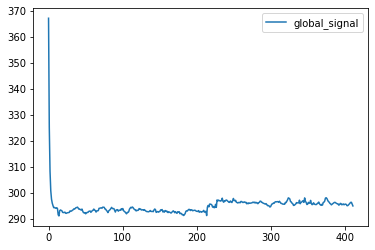

In [75]:
#plt.plot(confounds['cosine00'],label = 'cosine00')
#plt.plot(drop_confound_df['cosine01'],label = 'cosine01')
#plt.plot(drop_confound_df['cosine02'],label = 'cosine02')
#plt.plot(drop_confound_df['t_comp_cor_00'],label = 't_comp_cor_00')
plt.plot(confounds['global_signal'],label = 'global_signal')

plt.legend()

In [76]:
fmri_glm = fmri_glm.fit(fmri_img, ev, conf)

In [77]:
design_matrix = fmri_glm.design_matrices_[0]
design_matrix

,LB_Cue,LS_Cue,N_Cue,WB_Cue,WS_Cue,global_signal,global_signal_derivative1,global_signal_derivative1_power2,global_signal_power2,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter,drift_1,drift_2,drift_3,drift_4,constant
0.0,0.0,0.000000,0.0,0.000000,0.000000,367.187470,-0.007569,0.067800,134826.638356,513.344469,0.019920,263522.543406,0.657511,255.139010,0.069758,0.069756,0.069753,0.069750,1.0
0.8,0.0,0.000000,0.0,0.000000,0.000000,325.301140,-41.886331,1754.464694,105820.831479,396.557923,-116.786546,157258.186049,13639.097297,230.847025,0.069753,0.069740,0.069717,0.069685,1.0
1.6,0.0,0.000000,0.0,0.000000,0.000000,308.341606,-16.959534,287.625787,95074.545907,334.358553,-62.199370,111795.641673,3868.761644,225.406709,0.069745,0.069707,0.069643,0.069554,1.0
2.4,0.0,0.000000,0.0,0.000000,0.000000,300.831505,-7.510101,56.401619,90499.594246,300.380251,-33.978301,90228.295283,1154.524967,223.266039,0.069733,0.069658,0.069533,0.069359,1.0
3.2,0.0,0.000000,0.0,0.000000,0.000000,297.576835,-3.254670,10.592876,88551.972632,280.473144,-19.907107,78665.184685,396.292903,223.032905,0.069717,0.069593,0.069387,0.069099,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324.8,0.0,-0.028745,0.0,0.006533,0.353856,295.974925,0.275044,0.075649,87601.156251,261.889573,0.724951,68586.148593,0.525553,222.624437,-0.069717,0.069593,-0.069387,0.069099,1.0
325.6,0.0,-0.023929,0.0,-0.011690,0.289384,296.371471,0.396546,0.157249,87836.049110,261.727043,-0.162531,68501.044806,0.026416,222.743935,-0.069733,0.069658,-0.069533,0.069359,1.0
326.4,0.0,-0.019456,0.0,-0.024144,0.220604,296.374150,0.002678,0.000007,87837.636575,261.809966,0.082924,68544.458504,0.006876,222.531199,-0.069745,0.069707,-0.069643,0.069554,1.0
327.2,0.0,-0.015479,0.0,-0.031910,0.157268,295.706305,-0.667845,0.446017,87442.218651,262.514587,0.704621,68913.908489,0.496490,222.959122,-0.069753,0.069740,-0.069717,0.069685,1.0


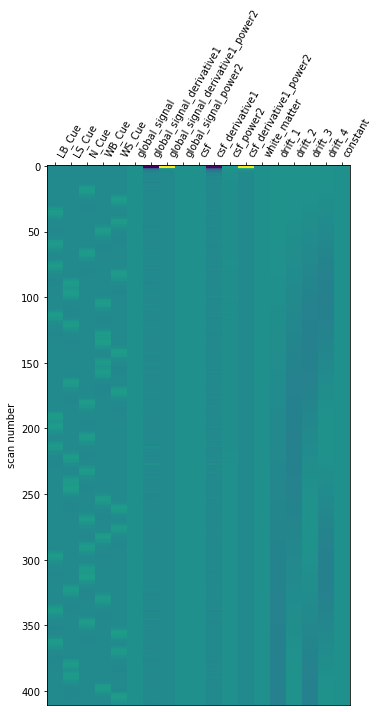

In [78]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design_matrix)
import matplotlib.pyplot as plt
plt.show()

In [62]:
from numpy import array
conditions = {
    'active - LB_Cue': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'active - LS_Cue':   array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'active - N_Cue':   array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'active - WB_Cue':   array([0., 0., 0, 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'active - WS_Cue':   array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
}

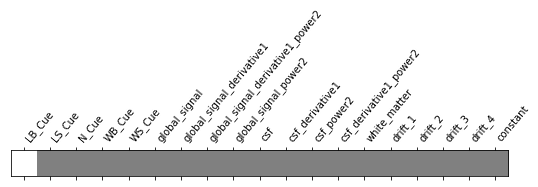

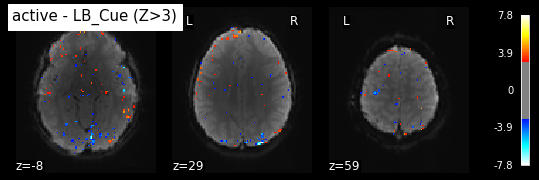

In [63]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(conditions['active - LB_Cue'], design_matrix=design_matrix)

eff_map = fmri_glm.compute_contrast(conditions['active - LB_Cue'],
                                    output_type='effect_size')
z_map = fmri_glm.compute_contrast(conditions['active - LB_Cue'],
                                  output_type='z_score')
plot_stat_map(z_map, bg_img=mean_img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True,
              title='active - LB_Cue (Z>3)')
plt.show()

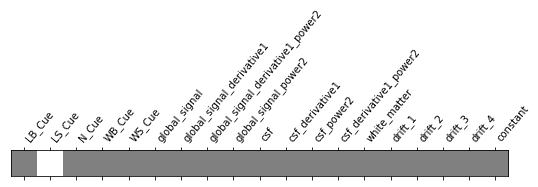

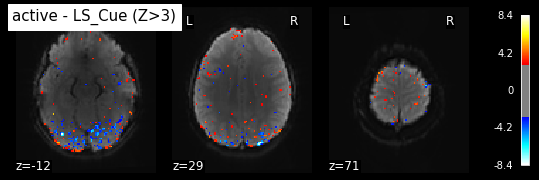

In [64]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(conditions['active - LS_Cue'], design_matrix=design_matrix)

eff_map = fmri_glm.compute_contrast(conditions['active - LS_Cue'],
                                    output_type='effect_size')
z_map = fmri_glm.compute_contrast(conditions['active - LS_Cue'],
                                  output_type='z_score')
plot_stat_map(z_map, bg_img=mean_img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True,
              title='active - LS_Cue (Z>3)')
plt.show()

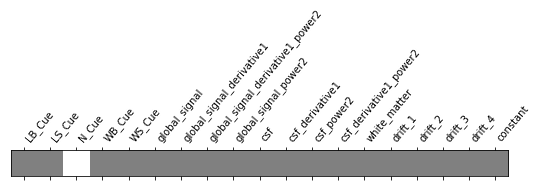

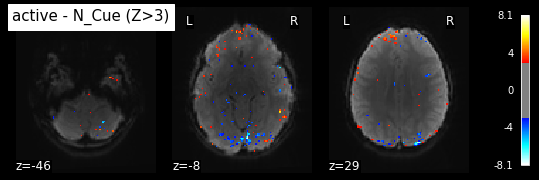

In [65]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(conditions['active - N_Cue'], design_matrix=design_matrix)

eff_map = fmri_glm.compute_contrast(conditions['active - N_Cue'],
                                    output_type='effect_size')
z_map = fmri_glm.compute_contrast(conditions['active - N_Cue'],
                                  output_type='z_score')
plot_stat_map(z_map, bg_img=mean_img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True,
              title='active - N_Cue (Z>3)')
plt.show()

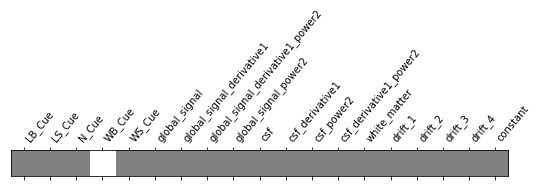

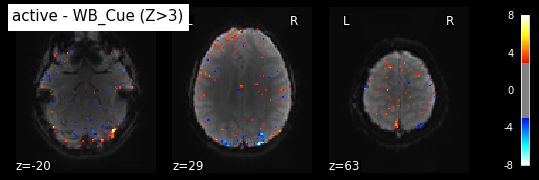

In [66]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(conditions['active - WB_Cue'], design_matrix=design_matrix)

eff_map = fmri_glm.compute_contrast(conditions['active - WB_Cue'],
                                    output_type='effect_size')
z_map = fmri_glm.compute_contrast(conditions['active - WB_Cue'],
                                  output_type='z_score')
plot_stat_map(z_map, bg_img=mean_img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True,
              title='active - WB_Cue (Z>3)')
plt.show()

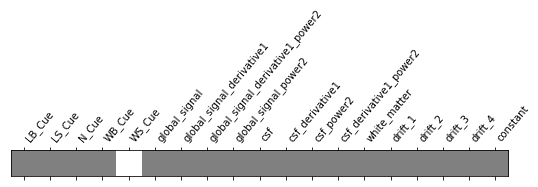

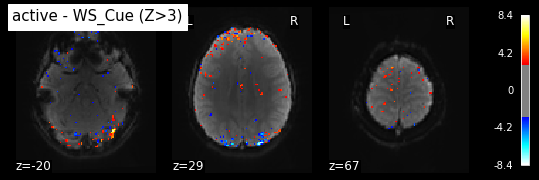

In [67]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(conditions['active - WS_Cue'], design_matrix=design_matrix)

eff_map = fmri_glm.compute_contrast(conditions['active - WS_Cue'],
                                    output_type='effect_size')
z_map = fmri_glm.compute_contrast(conditions['active - WS_Cue'],
                                  output_type='z_score')
plot_stat_map(z_map, bg_img=mean_img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True,
              title='active - WS_Cue (Z>3)')
plt.show()

In [79]:
# added

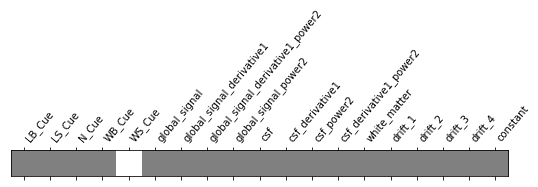

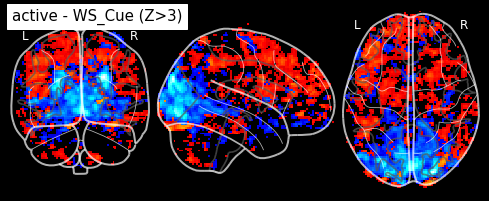

In [80]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(conditions['active - WS_Cue'], design_matrix=design_matrix)

eff_map = fmri_glm.compute_contrast(conditions['active - WS_Cue'],
                                    output_type='effect_size')
z_map = fmri_glm.compute_contrast(conditions['active - WS_Cue'],
                                  output_type='z_score')
plot_glass_brain(z_map, threshold = 3.0, black_bg = True, plot_abs = False,
                title = 'active - WS_Cue (Z>3)')
plt.show()

Uncorrected p< 0.0001 threshold: 3.291


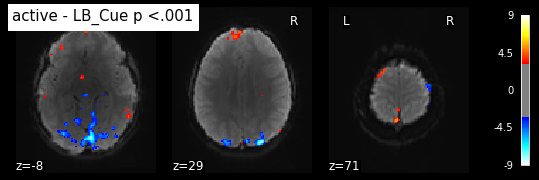

In [82]:
#active-LB cue
eff_map = fmri_glm.compute_contrast(conditions['active - LB_Cue'],
                                    output_type='effect_size')
z_map = fmri_glm.compute_contrast(conditions['active - LB_Cue'],
                                  output_type='z_score')
from nilearn.glm.thresholding import threshold_stats_img
_,threshold = threshold_stats_img(z_map, alpha = .001,height_control = 'fpr')
print('Uncorrected p< 0.0001 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img = mean_img, threshold = threshold,
             display_mode = 'z', cut_coords =3, black_bg = True, title = 'active - LB_Cue p <.001')
plt.show()

small cluster removed! 

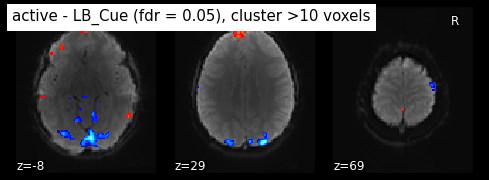

In [83]:
#active-LB cue_clean map 
eff_map = fmri_glm.compute_contrast(conditions['active - LB_Cue'],
                                    output_type='effect_size')
z_map = fmri_glm.compute_contrast(conditions['active - LB_Cue'],
                                  output_type='z_score')

clean_map, threshold = threshold_stats_img(
z_map, alpha = .05, height_control = 'fdr', cluster_threshold = 10)
plot_stat_map(clean_map, bg_img = mean_img, threshold = threshold, display_mode = 'z', cut_coords = 3, black_bg =True,
             colorbar = False, title = 'active - LB_Cue (fdr = 0.05), cluster >10 voxels')
plt.show()

In [89]:
from nilearn.reporting import get_clusters_table
eff_map = fmri_glm.compute_contrast(conditions['active - LB_Cue'],
                                    output_type='effect_size')
z_map = fmri_glm.compute_contrast(conditions['active - LB_Cue'],
                                  output_type='z_score')
table = get_clusters_table(z_map, stat_threshold=threshold,
                           cluster_threshold=20)
print(table)

   Cluster ID     X      Y     Z  Peak Stat Cluster Size (mm3)
0           1 -10.5   57.5  33.5   5.312443                704
1          1a -18.5   53.5  37.5   4.987585                   
2          1b -22.5   49.5  45.5   4.793953                   
3           2  -0.5   59.5 -14.5   5.233618                528
4          2a  -8.5   61.5 -14.5   4.692652                   
5           3  21.5   11.5  47.5   5.123952                160
6           4  -6.5   41.5  43.5   5.016091                232
7           5 -10.5   65.5  23.5   4.958313               2728
8          5a -14.5   63.5  15.5   4.717964                   
9          5b  -4.5   63.5  29.5   4.649206                   
10         5c -10.5   57.5  29.5   4.514755                   
11          6 -10.5   43.5  13.5   4.768254                656
12          7 -40.5   25.5 -12.5   4.587625                192
13          8 -44.5   33.5  -0.5   4.536913                432
14          9 -26.5  -98.5   7.5   4.471757            

# Evaluating Model 



In [90]:
table = get_clusters_table(z_map, stat_threshold=1,
                           cluster_threshold=20).set_index('Cluster ID', drop=True)
table.head()

,X,Y,Z,Peak Stat,Cluster Size (mm3)
Cluster ID,,,,,
1,-26.5,-100.5,5.5,5.900120,1392
1a,-16.5,-104.5,-2.5,3.720194,
1b,-32.5,-102.5,-6.5,2.085492,
2,-2.5,-58.5,69.5,5.554228,976
2a,-2.5,-70.5,63.5,2.938392,


In [91]:
from nilearn import input_data

# get the largest clusters' max x, y, and z coordinates
coords = table.loc[range(1, 7), ['X', 'Y', 'Z']].values

# extract time series from each coordinate
masker = input_data.NiftiSpheresMasker(coords)

/opt/miniconda-latest/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [92]:
# get and check model residuals

resid = masker.fit_transform(fmri_glm.residuals[0])

/opt/miniconda-latest/lib/python3.9/site-packages/nilearn/glm/regression.py:42: FutureWarning: 'resid' has been deprecated in version 0.7.0 and will be removed in version 0.9.0. Please use 'residuals' instead.
  warnings.warn(category=FutureWarning,


Mean residuals: 276.2669500076474
Mean residuals: 73.95370846149284
Mean residuals: 84.65775634809107
Mean residuals: 8.521167122139385
Mean residuals: 61.99992087916765
Mean residuals: 105.57247464572033


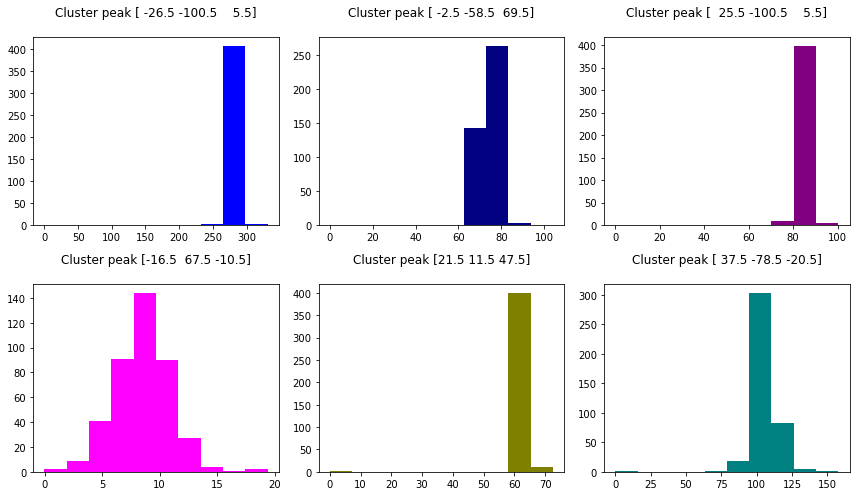

In [93]:
# colors for each of the clusters
colors = ['blue', 'navy', 'purple', 'magenta', 'olive', 'teal']


fig2, axs2 = plt.subplots(2, 3)
axs2 = axs2.flatten()
for i in range(0, 6):
    axs2[i].set_title('Cluster peak {}\n'.format(coords[i]))
    axs2[i].hist(resid[:, i], color=colors[i])
    print('Mean residuals: {}'.format(resid[:, i].mean()))

fig2.set_size_inches(12, 7)
fig2.tight_layout()

In [94]:
real_timeseries = masker.fit_transform(fmri_img)
predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])

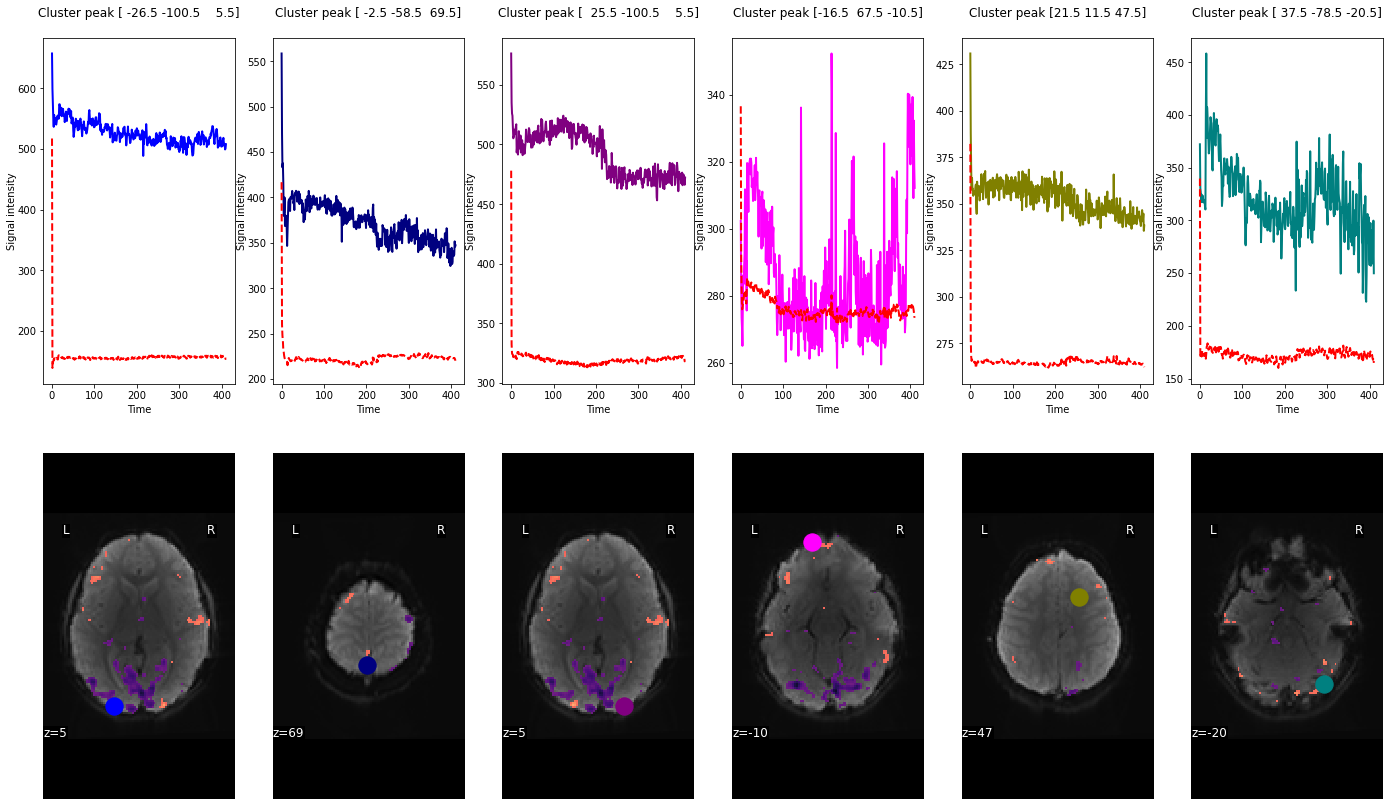

In [95]:
from nilearn import plotting

# plot the time series and corresponding locations
fig1, axs1 = plt.subplots(2, 6)
for i in range(0, 6):
    # plotting time series
    axs1[0, i].set_title('Cluster peak {}\n'.format(coords[i]))
    axs1[0, i].plot(real_timeseries[:, i], c=colors[i], lw=2)
    axs1[0, i].plot(predicted_timeseries[:, i], c='r', ls='--', lw=2)
    axs1[0, i].set_xlabel('Time')
    axs1[0, i].set_ylabel('Signal intensity', labelpad=0)
    # plotting image below the time series
    roi_img = plotting.plot_stat_map(
        z_map, cut_coords=[coords[i][2]], threshold=3.1, figure=fig1,
        axes=axs1[1, i], display_mode='z', colorbar=False, bg_img=mean_img, cmap='magma')
    roi_img.add_markers([coords[i]], colors[i], 300)
fig1.set_size_inches(24, 14)

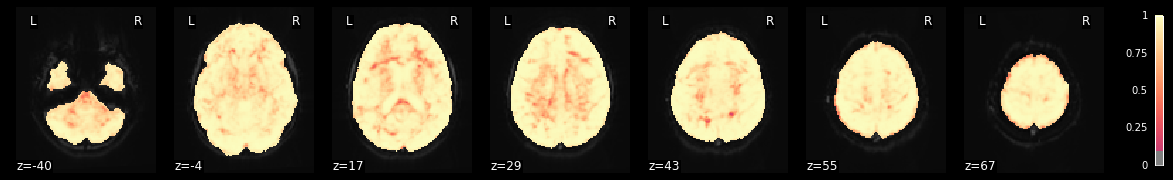

In [96]:
plotting.plot_stat_map(fmri_glm.r_square[0], bg_img=mean_img, threshold=.1,
                       display_mode='z', cut_coords=7, cmap='magma')

In [87]:
from nilearn.reporting import make_glm_report

report = make_glm_report(fmri_glm, contrasts = 'LB_Cue', bg_img= mean_img)


/opt/miniconda-latest/lib/python3.9/site-packages/nilearn/reporting/utils.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig(


In [88]:
report

drift_model,cosine
drift_order,1
fir_delays,[0]
high_pass (Hz),0.01
hrf_model,spm
noise_model,ar1
scaling_axis,False
signal_scaling,False
slice_time_ref,0.0
smoothing_fwhm,5
standardize,False


# GROUP ANALYSIS : second level

In [97]:
for subjects in ['NDARINVHPYB4URK','NDARINVLV81ZJGV']:
    
     # set the fMRI image
    
    fmri_img = '/sub-%s/ses-baselineYear1Arm1/func/sub-%s_ses-baselineYear1Arm1_task-MID_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc-preproc_bold.nii.gz'%(subject, subject)
    # read in the events 
    events = pd.read_table('/sub-%s/ses-baselineYear1Arm1/func/sub-%_events.tsv' %(subject, subject))
    
    # read in the confounds
    confounds = pd.read_table('sub-%s/ses-baselineYear1Arm1/func/sub-%s_ses-baselineYear1Arm1_task-MID_run-1_desc-confounds_timeseries.tsv' %(subject, subject))
    
    # restrict the to be included confounds to a subset
    confounds_glm = confounds[['WhiteMatter', 'GlobalSignal', 'FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']].replace(np.nan, 0)
    
    # run the GLM
    fmri_glm = fmri_glm.fit(fmri_img, events, confounds_glm)
    
    # compute the contrast as a z-map
    z_map_1 = fmri_glm.compute_contrast(conditions['active - LB_Cue'],
                                  output_type='z_score')
    z_map_2 = fmri_glm.compute_contrast(conditions['active - LS_Cue'],
                                  output_type='z_score')
    z_map_3 = fmri_glm.compute_contrast(conditions['active - N_Cue'],
                                  output_type='z_score')
    z_map_4 = fmri_glm.compute_contrast(conditions['active - WB_Cue'],
                                  output_type='z_score')
    z_map_5 = fmri_glm.compute_contrast(conditions['active - WS_Cue'],
                                  output_type='z_score')
   
    
    # save the z-map
    z_map_1.to_filename(join(outdir, 'sub-%s_ses-baselineYear1Arm1_task-MID_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc_zmap.nii.gz' %subject))
    z_map_2.to_filename(join(outdir, 'sub-%s_ses-baselineYear1Arm1_task-MID_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc_zmap.nii.gz' %subject))
    z_map_3.to_filename(join(outdir, 'sub-%s_ses-baselineYear1Arm1_task-MID_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc_zmap.nii.gz' %subject))
    z_map_4.to_filename(join(outdir, 'sub-%s_ses-baselineYear1Arm1_task-MID_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc_zmap.nii.gz' %subject))
    z_map_5.to_filename(join(outdir, 'sub-%s_ses-baselineYear1Arm1_task-MID_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc_zmap.nii.gz' %subject))
    
    

NameError: name 'subject' is not defined

In [98]:
from glob import glob
list_z_maps = glob(join(outdir, 'sub-*_ses-baselineYear1Arm1_task-MID_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc_zmap.nii.gz'))

list_z_maps

NameError: name 'join' is not defined

In [99]:
design_matrix = pd.DataFrame([1] * len(list_z_maps),
                             columns=['intercept'])

NameError: name 'list_z_maps' is not defined

In [100]:
from nilearn.glm.second_level import SecondLevelModel
second_level_model = SecondLevelModel()
second_level_model = second_level_model.fit(list_z_maps,
                                            design_matrix=design_matrix)

NameError: name 'list_z_maps' is not defined

In [101]:
z_map_group = second_level_model.compute_contrast(output_type='z_score')

ValueError: The model has not been fit yet

In [102]:
from scipy.stats import norm
p001_unc = norm.isf(0.001)

plotting.plot_glass_brain(z_map_group, colorbar=True, threshold=p001_unc,
                          title='Group Finger tapping (unc p<0.001)',
                          plot_abs=False, display_mode='x', cmap='magma')
plotting.show()

NameError: name 'z_map_group' is not defined